<a href="https://colab.research.google.com/github/vladtsyp/study_deeplearning/blob/main/task_3/task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Практическая работа №3. Сверточные нейронные сети (CNN)

# Задание №1. Использование глубокой сверточной нейронной сети для классификации предметов одежды на примере датасета Fashion MNIST


[Техническая документация по датасету](https://www.kaggle.com/datasets/zalando-research/fashionmnist)

## 1.1. Устанавливаем необходимые зависимости

In [1]:
# зависимости для всей практической
from keras import models
from keras.datasets import fashion_mnist # импорт исходного датасета
from keras.models import Sequential
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Activation, Dropout
import keras.utils
from keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
from imutils import paths
import random
import cv2, os
import pickle
from google.colab.patches import cv2_imshow

Mounted at /content/drive


## 1.2. Разделяем данные на обучающую и тестовую выборку

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# нормализация входных данных
x_train = x_train / 255
x_test = x_test / 255

y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)
 
print('Train: X = ', x_train.shape)
print('Test: X = ', x_test.shape)

4422102/4422102 [==============================] - 1s 0us/step
Train: X =  (60000, 28, 28)
Test: X =  (10000, 28, 28)


## 1.3. Визуализируем часть данных из датасета

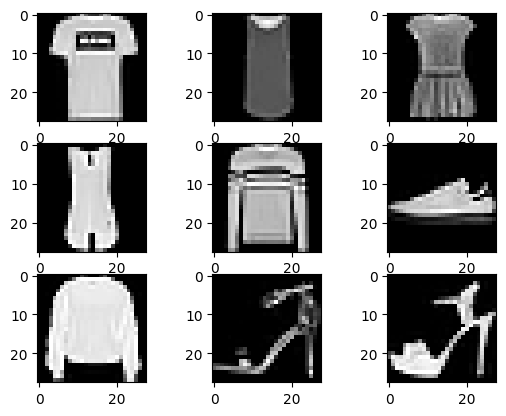

In [3]:
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
 
plt.show()

## 1.4. Создаём архитектуру нейронной сети и компилируем модель

In [4]:
# Ваш код

model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')
])
model.summary()

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               4

## 1.5. Обучаем модель

In [5]:
# Ваш код
EPOCH = 4
BS = 32

fas = model.fit(x_train, y_train_cat, batch_size=BS, epochs=EPOCH, validation_split=0.2)
print('\n')
model.evaluate(x_test, y_test_cat)
# метод evaluate() предназначен для оценки уже обученной модели с использованием данных проверки 
#(или тестирования) и соответствующих меток. Возвращает значение потерь и значения показателей для модели.

Epoch 1/4
1500/1500 [==============================] - 18s 5ms/step - loss: 0.4283 - accuracy: 0.8473 - val_loss: 0.3157 - val_accuracy: 0.8857
Epoch 2/4
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2824 - accuracy: 0.8963 - val_loss: 0.2995 - val_accuracy: 0.8927
Epoch 3/4
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2364 - accuracy: 0.9128 - val_loss: 0.2529 - val_accuracy: 0.9047
Epoch 4/4
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2017 - accuracy: 0.9256 - val_loss: 0.2599 - val_accuracy: 0.9060


313/313 [==============================] - 1s 3ms/step - loss: 0.2826 - accuracy: 0.9003


[0.28259918093681335, 0.9003000259399414]

## 1.5. Анализируем обученную модель. Строим график (графики) обучения

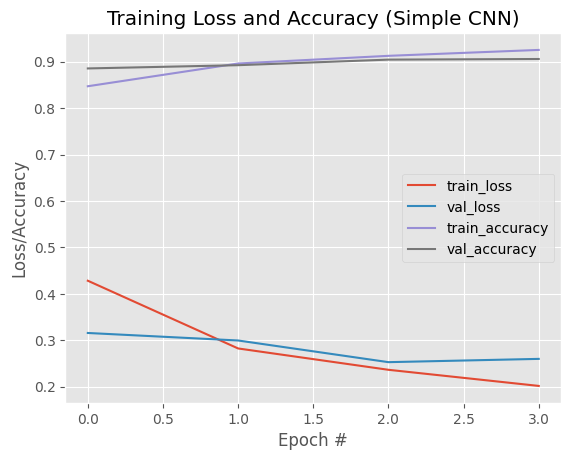

In [6]:
# Ваш код

N = np.arange(0, EPOCH)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, fas.history["loss"], label="train_loss")
plt.plot(N, fas.history["val_loss"], label="val_loss")
plt.plot(N, fas.history["accuracy"], label="train_accuracy")
plt.plot(N, fas.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy (Simple CNN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [7]:
print(classification_report(y_test, np.argmax(model.predict(x_test), axis=1)))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      1000
           1       0.99      0.99      0.99      1000
           2       0.84      0.84      0.84      1000
           3       0.91      0.89      0.90      1000
           4       0.72      0.94      0.82      1000
           5       0.99      0.99      0.99      1000
           6       0.80      0.60      0.69      1000
           7       0.96      0.97      0.96      1000
           8       0.98      0.99      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



## 1.6. Загружаем свои изображения. С помощью функции predict() получаем предсказание нейронной сети



> Требуется получить предсказания минимум по 5 изображениям, каждое из которых относится к разному классу. Не забудьте добавить метки к каждому классу (для этого можно просто создать список строк, каждая из которых будет соответствовать классу с определенным индексом см. [тех.док.](https://www.kaggle.com/datasets/zalando-research/fashionmnist)). Процент уверенности нейронной сети в своём предсказании выводить обязательно.



1/1 [==============================] - 0s 125ms/step


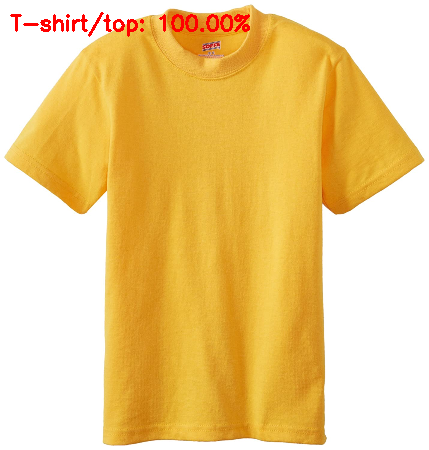

1/1 [==============================] - 0s 19ms/step


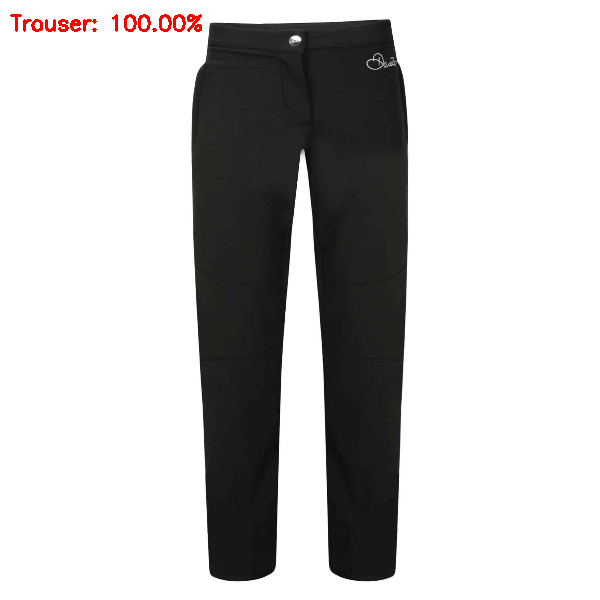

1/1 [==============================] - 0s 19ms/step


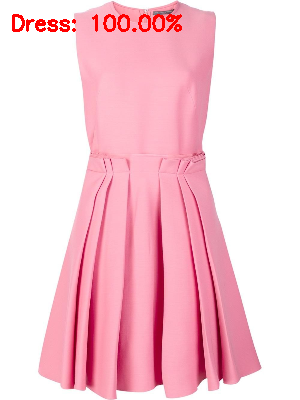

1/1 [==============================] - 0s 19ms/step


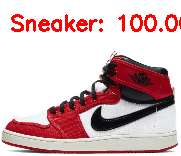

1/1 [==============================] - 0s 19ms/step


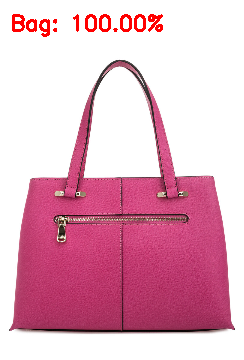

In [8]:
# Ваш код

labels =[]
list_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

imagePaths = sorted(list(paths.list_images("/content/drive/MyDrive/Colab Notebooks/task_3/task3_1_final_test")))

for imagePath in imagePaths:
  image = cv2.imread(imagePath, cv2.IMREAD_GRAYSCALE) # Преобразование изображения в оттенки серого при считывании
  image = cv2.resize(image, (28, 28)) # Изменение разрешения изображения
  image = cv2.bitwise_not(image) # Инверсия цветов (если в оригинале цифра написана черным цветом на белом фоне)
  orig = image
  image = image.reshape(-1, 28, 28, 1) # Приводим изображение из вида (28,28) в вид (1, 28, 28, 1)
  label = imagePath[-5] # извлекаем метку класса из пути к изображению (метка класса зависит от имени файла)
  labels.append(label) # обновляем список меток
  #print(label)
  output = cv2.resize(cv2.imread(imagePath), (0,0), fx=0.3, fy=0.3)
  pred = model.predict(image)
  x = pred.argmax(axis=1)[0]
  predname = list_labels[x]
  text = "{}: {:.2f}%".format(predname, pred[0][x] * 100)
  cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
  	(0, 0, 255), 2)
  cv2_imshow(output)

# Задание №2. Использование глубокой сверточной нейронной сети для классификации изображений по своему датасету


## 2.1.  Используя датасет, собранный для предыдущей работы, разработайте и обучите **свою** модель глубокой  **сверточной** нейронной сети для классификации изображений







In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
from zipfile import ZipFile
 
with ZipFile("/content/drive/MyDrive/Colab Notebooks/task_2/task2_2/dataset.zip", "r") as myzip:
    myzip.extractall(path='dataset')

In [ ]:
data = []
labels = []

# Собираем список путей к каждому изображению и перемешиваем их
imagePaths = sorted(list(paths.list_images("/content/dataset")))

random.seed(420) # для одинаковых результатов рандома
random.shuffle(imagePaths)

In [ ]:
for imagePath in imagePaths:
	
	image = cv2.imread(imagePath) # загружаем изображение
	image = cv2.resize(image, (64, 64))
	data.append(image) # добавляем в список

	label = imagePath.split(os.path.sep)[-2] 	# извлекаем метку класса из пути к изображению (метка класса зависит от имени папки)
	labels.append(label) # обновляем список меток

In [ ]:
data[0].shape

(64, 64, 3)

In [ ]:
# масштабируем интенсивности пикселей в диапазон [0, 1] (Нормализация данных)
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [ ]:
(x_train, x_test, y_train, y_test) = train_test_split(data,	labels, test_size=0.25, random_state=42)

In [ ]:
# конвертируем метки из целых чисел в векторы
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

In [ ]:
model_od1 = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])
model_od1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 16384)             0         
                                                                 
 dense_12 (Dense)            (None, 128)              

In [ ]:
SPEED = 0.00001

model_od1.compile(optimizer=Adam(learning_rate=SPEED),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
# Ваш код
EPOCH = 45
BS = 64

his_od1 = model_od1.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=BS, epochs=EPOCH)

Epoch 1/45
38/38 [==============================] - 1s 18ms/step - loss: 1.0751 - accuracy: 0.4362 - val_loss: 1.0603 - val_accuracy: 0.4705
Epoch 2/45
38/38 [==============================] - 0s 11ms/step - loss: 1.0547 - accuracy: 0.4747 - val_loss: 1.0408 - val_accuracy: 0.4918
Epoch 3/45
38/38 [==============================] - 0s 10ms/step - loss: 1.0348 - accuracy: 0.4897 - val_loss: 1.0210 - val_accuracy: 0.5257
Epoch 4/45
38/38 [==============================] - 0s 11ms/step - loss: 1.0127 - accuracy: 0.5333 - val_loss: 1.0118 - val_accuracy: 0.4831
Epoch 5/45
38/38 [==============================] - 0s 11ms/step - loss: 0.9942 - accuracy: 0.5333 - val_loss: 0.9792 - val_accuracy: 0.5571
Epoch 6/45
38/38 [==============================] - 0s 11ms/step - loss: 0.9741 - accuracy: 0.5588 - val_loss: 0.9655 - val_accuracy: 0.5947
Epoch 7/45
38/38 [==============================] - 0s 10ms/step - loss: 0.9580 - accuracy: 0.5722 - val_loss: 0.9439 - val_accuracy: 0.5947
Epoch 8/45
38

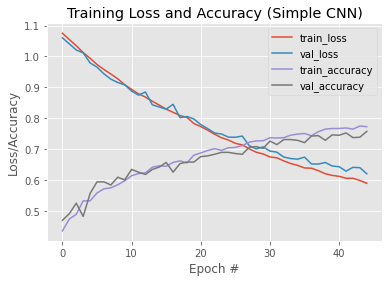

In [ ]:
N = np.arange(0, EPOCH)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, his_od1.history["loss"], label="train_loss")
plt.plot(N, his_od1.history["val_loss"], label="val_loss")
plt.plot(N, his_od1.history["accuracy"], label="train_accuracy")
plt.plot(N, his_od1.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy (Simple CNN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [ ]:
predictions = model_od1.predict(x_test, batch_size=32)
print(classification_report(y_test.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

25/25 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

       apple       0.74      0.81      0.77       278
      banana       0.75      0.70      0.72       325
      orange       0.81      0.79      0.80       194

    accuracy                           0.76       797
   macro avg       0.76      0.76      0.76       797
weighted avg       0.76      0.76      0.76       797



In [ ]:
# сохраняем модель и метки классов в бинарном представлении на диск
model_od1.save("/content/drive/MyDrive/Colab Notebooks/task_3/model_od1.h5", save_format="h5")
f = open("/content/drive/MyDrive/Colab Notebooks/task_3/label_bin_od1", "wb")
f.write(pickle.dumps(lb))
f.close()

## 2.2.   Ознакомьтесь с современными архитектурами сверточных нейронных сетей: [см. ссылку](https://medium.com/aiguys/how-cnn-architectures-evolved-c53d3819fef8). На основе рассмотренных архитектур, реализуйте (частично повторяя основные паттерны проектирования) и обучите модель сверточной нейронной сети. Укажите архитектуру, которой Вы "вдохновились"

Table 1: A table summary of the MiniVGGNet architecture.
https://pyimagesearch.com/2021/05/22/minivggnet-going-deeper-with-cnns/

In [ ]:
data = []
labels = []

# Собираем список путей к каждому изображению и перемешиваем их
imagePaths = sorted(list(paths.list_images("/content/dataset")))

random.seed(420) # для одинаковых результатов рандома
random.shuffle(imagePaths)

for imagePath in imagePaths:
	
	image = cv2.imread(imagePath) # загружаем изображение
	image = cv2.resize(image, (32, 32))
	data.append(image) # добавляем в список

	label = imagePath.split(os.path.sep)[-2] 	# извлекаем метку класса из пути к изображению (метка класса зависит от имени папки)
	labels.append(label) # обновляем список меток

# масштабируем интенсивности пикселей в диапазон [0, 1] (Нормализация данных)
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

(x_train, x_test, y_train, y_test) = train_test_split(data,	labels, test_size=0.25, random_state=42)

# конвертируем метки из целых чисел в векторы
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

In [ ]:
model_od2 = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=(32, 32, 3)),
    Activation("relu"),
    BatchNormalization(),
    Conv2D(32, (3, 3), padding='same'),
    Activation("relu"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), padding="same"),
    Activation("relu"),
    BatchNormalization(),
    Conv2D(64, (3, 3), padding="same"),
    Activation("relu"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(512),
    Activation('relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(3, activation='softmax')
    ])
model_od2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_15 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_15 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 activation_16 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_16 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                     

In [ ]:
SPEED = 0.000001

model_od2.compile(optimizer=Adam(learning_rate=SPEED),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
# Ваш код
EPOCH = 500
BS = 64

his_od2 = model_od2.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=BS, epochs=EPOCH)

Epoch 1/500
38/38 [==============================] - 2s 22ms/step - loss: 1.8826 - accuracy: 0.3541 - val_loss: 1.1414 - val_accuracy: 0.3488
Epoch 2/500
38/38 [==============================] - 1s 15ms/step - loss: 1.8776 - accuracy: 0.3428 - val_loss: 1.3031 - val_accuracy: 0.3488
Epoch 3/500
38/38 [==============================] - 1s 14ms/step - loss: 1.8997 - accuracy: 0.3378 - val_loss: 1.5050 - val_accuracy: 0.3488
Epoch 4/500
38/38 [==============================] - 1s 15ms/step - loss: 1.7984 - accuracy: 0.3713 - val_loss: 1.7004 - val_accuracy: 0.3488
Epoch 5/500
38/38 [==============================] - 1s 14ms/step - loss: 1.7805 - accuracy: 0.3792 - val_loss: 1.8714 - val_accuracy: 0.3488
Epoch 6/500
38/38 [==============================] - 1s 13ms/step - loss: 1.7908 - accuracy: 0.3658 - val_loss: 1.9586 - val_accuracy: 0.3488
Epoch 7/500
38/38 [==============================] - 1s 14ms/step - loss: 1.7559 - accuracy: 0.3692 - val_loss: 1.9493 - val_accuracy: 0.3488
Epoch 

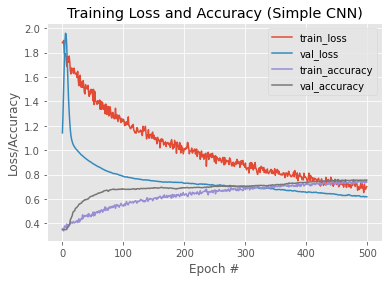

In [ ]:
N = np.arange(0, EPOCH)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, his_od2.history["loss"], label="train_loss")
plt.plot(N, his_od2.history["val_loss"], label="val_loss")
plt.plot(N, his_od2.history["accuracy"], label="train_accuracy")
plt.plot(N, his_od2.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy (Simple CNN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [ ]:
predictions = model_od2.predict(x_test, batch_size=32)
print(classification_report(y_test.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

25/25 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

       apple       0.79      0.74      0.77       278
      banana       0.82      0.66      0.73       325
      orange       0.66      0.94      0.78       194

    accuracy                           0.76       797
   macro avg       0.76      0.78      0.76       797
weighted avg       0.77      0.76      0.75       797



In [ ]:
# сохраняем модель и метки классов в бинарном представлении на диск
model_od2.save("/content/drive/MyDrive/Colab Notebooks/task_3/model_od2.h5", save_format="h5")
f = open("/content/drive/MyDrive/Colab Notebooks/task_3/label_bin_od2", "wb")
f.write(pickle.dumps(lb))
f.close()

## 2.3. Сохраните полученные модели

In [ ]:
# сохраняем модели и метки классов в бинарном представлении на диск
model_od1.save("/content/drive/MyDrive/Colab Notebooks/task_3/model_od1.h5", save_format="h5")
model_od2.save("/content/drive/MyDrive/Colab Notebooks/task_3/model_od2.h5", save_format="h5")
f = open("/content/drive/MyDrive/Colab Notebooks/task_3/label_bin", "wb")
f.write(pickle.dumps(lb))
f.close()

## 2.4. Загрузите обученную модель из прошлой практической работы


In [ ]:
# Ваш код
lb = pickle.loads(open("/content/drive/MyDrive/Colab Notebooks/task_3/models/label_bin", "rb").read()) # метки
model = models.load_model("/content/drive/MyDrive/Colab Notebooks/task_3/models/model.h5") # модель из второй практической
model_od1 = models.load_model("/content/drive/MyDrive/Colab Notebooks/task_3/models/model_od1.h5") # модель из третьей практической, задание 2.1
model_od2 = models.load_model("/content/drive/MyDrive/Colab Notebooks/task_3/models/model_od2.h5") # модель из третьей практической, задание 2.2


## 2.5. Сравните между собой точность всех трёх моделей, подавая на вход одинаковые изображения (15 разных изображений). Сравните предсказания каждой из моделей и сделайте выводы

In [ ]:
from zipfile import ZipFile
 
with ZipFile("/content/drive/MyDrive/Colab Notebooks/task_3/test_data.zip", "r") as myzip:
    myzip.extractall(path='test_data')

In [ ]:
# Ваш код
data1 = [] # 64x64x3 (вектор, ndim = 1), для первой модели
data2 = [] # 64x64x3
data3 = [] # 32x32x3
labels = []

# Собираем список путей к каждому изображению и перемешиваем их
imagePaths = sorted(list(paths.list_images("/content/test_data")))

random.seed(420) # для одинаковых результатов рандома
random.shuffle(imagePaths)

for imagePath in imagePaths:
  image = cv2.imread(imagePath) # загружаем изображение
  image1 = cv2.resize(image, (64, 64)).flatten()
  image2 = cv2.resize(image, (64, 64))
  image3 = cv2.resize(image, (32, 32))
  data1.append(image1) # добавляем в список
  data2.append(image2)
  data3.append(image3)
  label = imagePath.split(os.path.sep)[-2] 	# извлекаем метку класса из пути к изображению (метка класса зависит от имени папки)
  labels.append(label) # обновляем список меток

# масштабируем интенсивности пикселей в диапазон [0, 1] (Нормализация данных)
data1 = np.array(data1, dtype="float") / 255.0
data2 = np.array(data2, dtype="float") / 255.0
data3 = np.array(data3, dtype="float") / 255.0
labels = np.array(labels)

# конвертируем метки из целых чисел в векторы
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [ ]:
predictions = model.predict(data1)
print(classification_report(labels.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

1/1 [==============================] - 3s 3s/step
              precision    recall  f1-score   support

       apple       0.60      0.60      0.60         5
      banana       0.43      0.60      0.50         5
      orange       0.67      0.40      0.50         5

    accuracy                           0.53        15
   macro avg       0.57      0.53      0.53        15
weighted avg       0.57      0.53      0.53        15



In [ ]:
predictions = model_od1.predict(data2)
print(classification_report(labels.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

1/1 [==============================] - 5s 5s/step
              precision    recall  f1-score   support

       apple       0.67      0.40      0.50         5
      banana       0.50      0.80      0.62         5
      orange       1.00      0.80      0.89         5

    accuracy                           0.67        15
   macro avg       0.72      0.67      0.67        15
weighted avg       0.72      0.67      0.67        15



In [ ]:
predictions = model_od2.predict(data3)
print(classification_report(labels.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

1/1 [==============================] - 0s 228ms/step
              precision    recall  f1-score   support

       apple       0.75      0.60      0.67         5
      banana       0.60      0.60      0.60         5
      orange       0.83      1.00      0.91         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15



**Выводы:** последняя модель (*model_od2*) на архитектуре MiniVGGNet в среднем обучилась распознавать лучше (в среднем, 73% предсказаний против 72 и 57).  
С другой же стороны, для обучения этой модели понадобилось 500 эпох и заняло по времени 323 секунды, в то время как *model_od1* понадобилось всего лишь 45 эпох и 27 секунд для обучения. Разница их средней точности предсказаний - один процент.

# Задание №3*. Использование глубокой сверточной нейронной сети для восстановления изображения

## 3.1. Работа с данными

Будем работать с набором данным `fetch_olivetti_faces` из `sklearn`.

### 3.1.1. Переведите векторы в настоящие изображения из двух размерностей

In [ ]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split

data, _ = fetch_olivetti_faces(return_X_y=True)
train, test = train_test_split(data, test_size=0.2, random_state=4)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [ ]:
train.shape

(320, 4096)

Сейчас изображение - это вектор, имеющий размерность 4096.

In [ ]:
# Ваш код здесь

train = train.reshape((train.shape[0], 64, 64))
test = test.reshape((test.shape[0], 64, 64))

test.shape

(80, 64, 64)

### 3.1.2. Отрисуйте несколько примеров

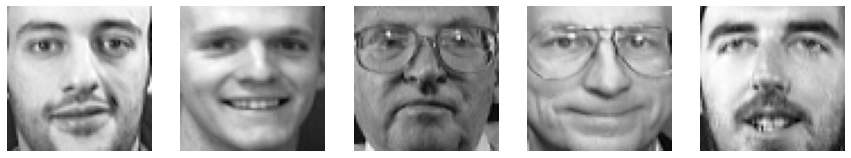

In [ ]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 5, figsize=(15, 10))

for i in range(5):
    ax[i].imshow(train[i], cmap='gray')
    ax[i].axis('off')

Поделим данные на X и y, где X - это верхняя часть лица человека, на этом модель будет обучаться, а y - это нижняя часть лица человека - её будем предсказывать.

In [ ]:
n_pixels = train.shape[1]

# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2, :]
# Lower half of the faces
y_train = train[:, n_pixels // 2:, :]


X_test = test[:, :(n_pixels + 1) // 2, :]
y_test = test[:, n_pixels // 2:, :]

In [ ]:
X_train.shape

(320, 32, 64)

Вот один пример обучающей пары.

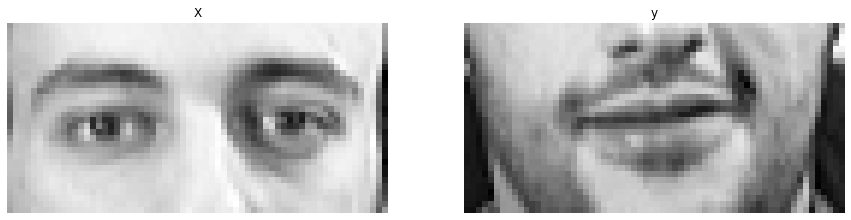

In [ ]:
import matplotlib.pyplot as plt

idx = 0

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].imshow(X_train[idx], cmap='gray')
ax[0].set_title('X')
ax[1].imshow(y_train[idx], cmap='gray')
ax[1].set_title('y')
ax[0].axis('off')
ax[1].axis('off')

plt.show()

### 3.1.3. Измените размерность y
Остается только изменить размерность y, т.к. сейчас $y$ - картинка 32x64, а выход нейронной сети у нас будет одномерный и равный 32 * 64 = 2048. 

In [ ]:
y_train_n = y_train.reshape(y_train.shape[0], 32 * 64)
y_test_n = y_test.reshape(y_test.shape[0], 32 * 64)

y_train_n.shape

(320, 2048)

## 3.2. Создайте архитектуру для этой задачи

In [ ]:
# Ваш код здесь
model_faces = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 64, 1)),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(2048, activation='sigmoid')
])
model_faces.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 32, 64, 32)        320       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 16, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 16, 32, 64)        18496     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 8, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 8, 16, 128)        73856     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 4, 8, 128)       

## 3.3. Скомпилируйте сеть

Подберите нужную функцию потерь и метрику. Оптимизатор можете использовать 'adam'

In [ ]:
# Ваш код здесь
SPEED = 0.0001 #001

model_faces.compile(optimizer=Adam(learning_rate=SPEED),
             loss='mse',
             metrics=['mae'])

## 3.4. Обучите нейросеть

Выберите нужное количество эпох.


In [ ]:
# Ваш код здесь
EPOCH = 300 #45
BS = 32

his_fas = model_faces.fit(X_train, y_train_n, batch_size=BS, epochs=EPOCH, validation_split=0.2)
# validation_data=(X_test, y_test_n)

Epoch 1/300
8/8 [==============================] - 1s 30ms/step - loss: 0.0272 - mae: 0.1344 - val_loss: 0.0271 - val_mae: 0.1347
Epoch 2/300
8/8 [==============================] - 0s 11ms/step - loss: 0.0267 - mae: 0.1330 - val_loss: 0.0263 - val_mae: 0.1329
Epoch 3/300
8/8 [==============================] - 0s 9ms/step - loss: 0.0255 - mae: 0.1301 - val_loss: 0.0249 - val_mae: 0.1289
Epoch 4/300
8/8 [==============================] - 0s 9ms/step - loss: 0.0237 - mae: 0.1250 - val_loss: 0.0236 - val_mae: 0.1248
Epoch 5/300
8/8 [==============================] - 0s 11ms/step - loss: 0.0223 - mae: 0.1207 - val_loss: 0.0224 - val_mae: 0.1216
Epoch 6/300
8/8 [==============================] - 0s 9ms/step - loss: 0.0211 - mae: 0.1176 - val_loss: 0.0218 - val_mae: 0.1198
Epoch 7/300
8/8 [==============================] - 0s 10ms/step - loss: 0.0206 - mae: 0.1158 - val_loss: 0.0215 - val_mae: 0.1190
Epoch 8/300
8/8 [==============================] - 0s 10ms/step - loss: 0.0204 - mae: 0.1151 

## 3.5. Сделайте предсказания на тестовых данных

In [ ]:
# Ваш код здесь
preds = model_faces.predict(X_test)
model_faces.evaluate(X_test, y_test_n)
# метод evaluate() предназначен для оценки уже обученной модели с использованием данных проверки 
#(или тестирования) и соответствующих меток. Возвращает значение потерь и значения показателей для модели.

3/3 [==============================] - 0s 5ms/step - loss: 0.0101 - mae: 0.0752


[0.010050571523606777, 0.0752231627702713]

## 3.6. Посчитайте метрику качества на тестовых данных

In [ ]:
# Ваш код здесь

from sklearn.metrics import mean_absolute_error

mean_absolute_error(preds, y_test_n)

0.07522316

## 3.7. Преобразуйте предсказанные векторы в двумерное изображение (поменяйте их размерность)

In [ ]:
# Ваш код здесь

pred_test = preds.reshape(preds.shape[0], 32, 64)

Отрисуйте все предсказания.

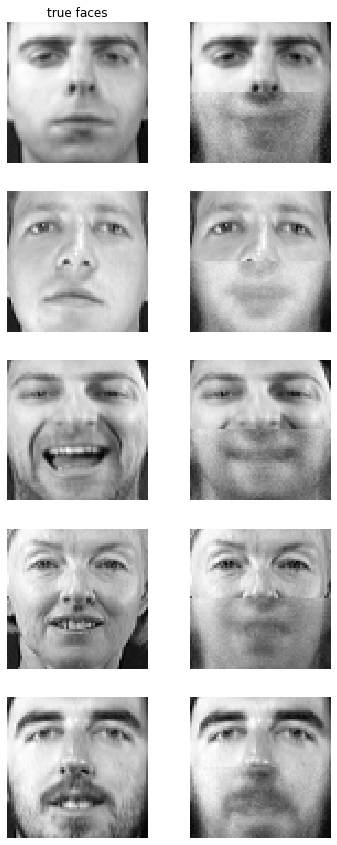

In [ ]:
# Пример кода:

n_faces = 5
n_cols = 2
image_shape = (64, 64)
plt.figure(figsize=(3 * n_cols, 3 * n_faces))

for i in range(5):
    true_face = np.vstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

    completed_face = np.vstack((X_test[i], pred_test[i])) #pred_test

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 2)

    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 2)

    sub.axis("off")
    sub.imshow(
        completed_face.reshape(image_shape),
        cmap=plt.cm.gray,
        interpolation="nearest",
    )

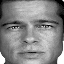

In [ ]:
### добавить своё лицо

test_face = cv2.imread('/content/test_face.PNG', cv2.IMREAD_GRAYSCALE) # загружаем изображение
test_face = cv2.resize(test_face, (64, 64))
test_face = test_face.reshape(64, 64)

cv2_imshow(test_face)

In [ ]:
def test_image(image_path):
    n_faces = 1
    n_cols = 2
    image_shape = (64, 64)
    plt.figure(figsize=(3 * n_cols, 3 * n_faces))

    image_shape = (64, 64)
    image = cv2.imread(image_path)
    image = cv2.resize(image, image_shape)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    image = image.astype("float") / 255.0
    true_face = image.copy()

    sub = plt.subplot(n_faces, n_cols, 0 * n_cols + 1, title="true face")
    sub.axis("off")
    sub.imshow(
        true_face, cmap=plt.cm.gray, interpolation="nearest"
    )

    n_pixels = image.shape[1]
    image = np.array([image])
    x = image[:, :(n_pixels + 1) // 2, :]
    preds = model_faces.predict(x)
    pred_test = np.array([pred.reshape(32, 64) for pred in preds])
    completed_face = np.vstack((x[0], pred_test[0]))

    sub = plt.subplot(n_faces, n_cols, 0 * n_cols + 2, title="generated face")
    sub.axis("off")
    sub.imshow(
        completed_face.reshape(image_shape),
        cmap=plt.cm.gray,
        interpolation="nearest",
    )

1/1 [==============================] - 0s 76ms/step


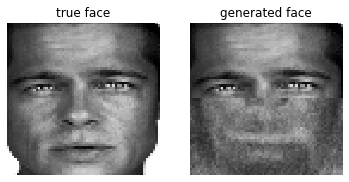

In [ ]:
test_image('/content/test_face.PNG')

1/1 [==============================] - 0s 31ms/step


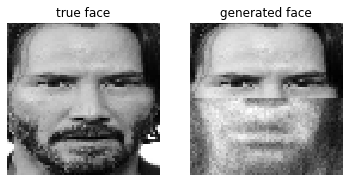

In [ ]:
test_image('/content/test_face_2.PNG')